# UMAP of Microbial Datasets in Building Materials

In [108]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

'''May require command line installation of umap package by running the following line:
    conda install umap-learn'''
import umap

%matplotlib inline

## UMAP analysis of 16S dataset

File Format Requirements:

1. If ".biom" file, use the following link to convert to txt file: https://biom-format.org/documentation/biom_conversion.html

2. If ".txt" file, use the following code snippet to convert to csv file:
    
    import csv
    with open('ITS-metadata-withcounts.txt', 'r') as in_file:
        stripped = (line.strip() for line in in_file)
        lines = (line.split(",") for line in stripped if line)
        with open('ITS_metadata.csv', 'w') as out_file:
            writer = csv.writer(out_file)
            writer.writerows(lines)
            
3. If ".csv" or ".tsv", you cannot have a header (it will mess up the conversion to an OTU table)



In [124]:
from sklearn import preprocessing

# Formatting CLR transformed data file
file_loc1 = "16S_table.tsv"
OTU_table = pd.read_csv(file_loc1, sep='\t', skiprows=1)
OTU_table = OTU_table.set_index('#OTU ID')

# Might have to coerce column names to be of type float
OTU_table = OTU_table.T
OTU_table.iloc[:0] = OTU_table.iloc[:0].astype(float)

OTU_table

#OTU ID,e8ef8c8ff1a45839f341cc3deb100e11,bdd3a34684f72c9ce49740a71f7982ee,459c4270b31f40d5833d810ef5a9a325,68a15cfb39b45285f8069cac3daf2b15,80ae4382cf9ef72e576c65de54ce9601,c8eba609b8347befad2e24712f16b2ab,677abf4babff8ff9be654c46171c4fe0,42f041cd125397a86576c21077850306,6f81be7a45dea95efa2d64ab4a225b99,12677e3652553d3f18d4f9e1847214e9,...,a30cb8fe125073055f92b24775e954dc,9ce19da73b9d24436b24d8b5599892e7,13b1b3566a128231477f4757eeb81a2f,52ad40b7e9b31a00a2daefdf81c3c3cf,7b1b1b7ef4c566a77a24cb28dec2817a,beb7830ac84395f6dae340db9dcc8cb3,9181d1b3852e262a3e7a2ac6e9b82acc,0445cc54033a2ac925191dcbf9cc4805,7e212bf9a86330ff0dcd66eff2f20679,fee24db0f120624ae6533ca06d776a1f
Extraction-control1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,80.0,0.0,0.0,0.0,0.0
PCR-control1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T0D0,0.0,0.0,126.0,0.0,0.0,173.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,99.0,0.0,0.0,0.0,0.0
T0F0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T1D1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T5R7D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T5R7L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T5R9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T5R9D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0


In [125]:
# Mapping table w/ features of interest 
file_loc2 = "16s-metadata-with-counts.tsv"

OTU_map_table = pd.read_table(file_loc2)
OTU_map_table = OTU_map_table.set_index('SampleID')

# Remove rows with IDs not in OTU table
OTU_map_table = OTU_map_table.drop(OTU_map_table.index[[0,97,99]])

OTU_map_table

,BarcodeSequence,Linker,Material,Sampling,Coupon,TimePoint,Live_Dead,Count,Count_Rounded
SampleID,,,,,,,,,
T1R1,TACCGCTTCTTC,CCGGACTACHVGGGTWTCTAAT,MDF,Resample,R1,T1,whole,132871.57890,100000.0
T1R4,TGTGCGATAACA,CCGGACTACHVGGGTWTCTAAT,MDF,Resample,R4,T1,whole,25988.11765,30000.0
T1R5,GATTATCGACGA,CCGGACTACHVGGGTWTCTAAT,MDF,Resample,R5,T1,whole,32959.53333,30000.0
T1R7,GCCTAGCCCAAT,CCGGACTACHVGGGTWTCTAAT,Gypsum,Resample,R7,T1,whole,147266.00000,100000.0
T1R9,GATGTATGTGGT,CCGGACTACHVGGGTWTCTAAT,Gypsum,Resample,R9,T1,whole,110449.50000,100000.0
...,...,...,...,...,...,...,...,...,...
T4D13,TGGTCGCATCGT,CCGGACTACHVGGGTWTCTAAT,Gypsum,Single_sample,D13,T5,whole,NaN,NaN
T4D14,TGTAAGACTTGG,CCGGACTACHVGGGTWTCTAAT,Gypsum,Single_sample,D14,T5,whole,NaN,NaN
T4D15,CGGATCTAGTGT,CCGGACTACHVGGGTWTCTAAT,Gypsum,Single_sample,D15,T5,whole,NaN,NaN


## Information on UMAP:
    
Important parameters of ".UMAP" function: 
1. metric - options listed in scipy.spatial.distance.pdist, which includes 'euclidean', 'jaccard', and 'braycurtis'


2. n_neighbors - number of approximate nearest neighbors used to construct the initial high-dimensional graph
    * Low values prioritize local structure, high values prioritize global structure
    * n_neighbors of 15 is the default


3. min_dist - minimum distance between points in low-dimensional space
    * Low values lead to more tightly packed embeddings
    * min_dist of 0.1 is the default
    
For more information on how to modify UMAP parameters, refer to the following link:
https://pair-code.github.io/understanding-umap/

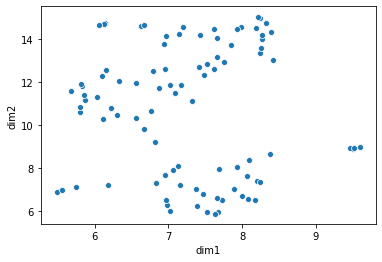

In [126]:
reducer = umap.UMAP(n_components = 2, n_neighbors = 5, metric = 'braycurtis', random_state = 0, min_dist = 0.1)
embeddings = reducer.fit_transform(OTU_table)
plot_samples = pd.DataFrame(data = embeddings, columns = ['dim1', 'dim2'], index = OTU_table.index)

# Unlabeled UMAP
sns.scatterplot(x = 'dim1', y = 'dim2', data = plot_samples)

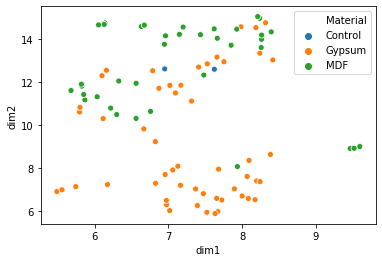

In [127]:
# Clarify mapping variable you would like to use to label your plot
plot_samples = pd.concat([plot_samples, OTU_map_table['Material']], axis = 1, sort=False)

# Labeled UMAP
sns.scatterplot(x = 'dim1', y = 'dim2', hue = 'Material', data = plot_samples)

## UMAP analysis of ITS dataset

In [128]:
# Formatting CLR transformed data file
file_loc3 = "ITS_table.csv"
OTU_table = pd.read_csv(file_loc3, sep='\t', skiprows=1)
OTU_table = OTU_table.set_index('#OTU ID')

#Transpose OTU table to match format of the mapping table
OTU_table = OTU_table.T

# Might have to coerce column names to be of type float
OTU_table.iloc[:0] = OTU_table.iloc[:0].astype(float)

OTU_table

#OTU ID,SH1706366.08FU_KF669440_reps,SH1692789.08FU_DQ645804_refs,SH1692847.08FU_AB185279_reps,SH1800526.08FU_JX280771_refs,SH1712306.08FU_GU237794_refs,SH1800547.08FU_HM365257_refs,SH1692776.08FU_AF033422_refs,SH1729543.08FU_FR682361_reps,SH1694434.08FU_EU037063_reps,SH1692793.08FU_JN617685_refs,...,SH1740262.08FU_GQ169497_reps,SH1744611.08FU_EF679363_refs,SH1744613.08FU_DQ780343_refs,SH1744621.08FU_KC181928_reps,SH1800509.08FU_HM365253_refs,SH1800512.08FU_KX976589_refs,SH1800524.08FU_KC131371_reps,SH1800668.08FU_AJ271583_reps,SH1831755.08FU_AY943051_reps,SH1838680.08FU_KX263845_reps
PCR-control,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T0D0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T1D2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
T1D3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T1R1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T1R10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
T1R4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T1R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T2D4,0.0,529.0,1077.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,2.0,797.0,624.0,394.0,46.0,0.0,0.0,186.0,0.0,0.0
T2D5,0.0,165.0,80.0,0.0,0.0,0.0,72.0,0.0,0.0,0.0,...,86.0,766.0,168.0,60.0,87.0,0.0,0.0,44.0,0.0,0.0


In [129]:
# Mapping table w/ features of interest
file_loc4 = "ITS_metadata.tsv"

OTU_map_table = pd.read_csv(file_loc4, sep='\t')
OTU_map_table = OTU_map_table.set_index('SampleID')
OTU_map_table

,BarcodeSequence,Linker,Material,Condition,Sampling,TimePoint,Live_Dead,Coupon,Counts,CountsRound
SampleID,,,,,,,,,,
#q2:types,categorical,categorical,categorical,categorical,categorical,categorical,categorical,NaN,NaN,NaN
T0D0,TATGGTACCCAG,CCGCTGCGTTCTTCATCGATGC,Gypsum,dry,Single_sample,T0,Whole,D0,NaN,NaN
T0F0,TACAATATCTGT,CCGCTGCGTTCTTCATCGATGC,MDF,dry,Single_sample,T0,Whole,F0,NaN,NaN
T1D1,AATTTAGGTAGG,CCGCTGCGTTCTTCATCGATGC,Gypsum,wet,Single_sample,T1,Whole,D1,NaN,NaN
T1D2,GACTCAACCAGT,CCGCTGCGTTCTTCATCGATGC,Gypsum,wet,Single_sample,T1,Whole,D2,NaN,NaN
T1D3,GCCTCTACGTCG,CCGCTGCGTTCTTCATCGATGC,Gypsum,wet,Single_sample,T1,Whole,D3,NaN,NaN
T2D4,ACTACTGAGGAT,CCGCTGCGTTCTTCATCGATGC,Gypsum,wet,Single_sample,T2,Whole,D4,NaN,NaN
T2D5,AATTCACCTCCT,CCGCTGCGTTCTTCATCGATGC,Gypsum,wet,Single_sample,T2,Whole,D5,NaN,NaN
T2D6,CGTATAAATGCG,CCGCTGCGTTCTTCATCGATGC,Gypsum,wet,Single_sample,T2,Whole,D6,NaN,NaN


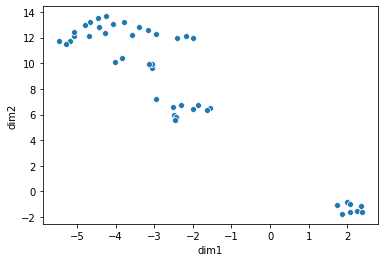

In [133]:
reducer = umap.UMAP(n_components = 2, n_neighbors = 5, metric = 'euclidean', random_state = 0, min_dist = 0.1)
embeddings = reducer.fit_transform(OTU_table)
plot_samples = pd.DataFrame(data = embeddings, columns = ['dim1', 'dim2'], index = OTU_table.index)

# Unlabeled UMAP
sns.scatterplot(x = 'dim1', y = 'dim2', data = plot_samples)

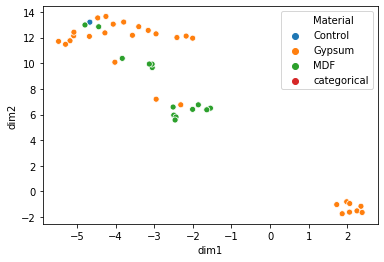

In [134]:
plot_samples = pd.concat([plot_samples, OTU_map_table['Material']], axis = 1, sort=False)

# Labeled UMAP
sns.scatterplot(x = 'dim1', y = 'dim2', hue = 'Material', data = plot_samples)